In [1]:
import pandas as pd
import geopandas as gpd
import descartes
from matplotlib import pyplot
import mapclassify as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [9]:
#function that reads in GeoJSON files and csv data, and returns a merged dataframe
#input parameter is str state name (or india for full map) -- needs to be the same for json and csv
def combine(state):  
    geo = gpd.read_file('maps/{}.json'.format(state))
    geo.head()
    data = '{}.csv'.format(state)
    df = pd.read_csv(data, names = ['district', 'R', 'Rproj'], skiprows = 1)
    df.head()
    merged = geo.merge(df, left_on = 'district', right_on = 'district')
    return merged

In [10]:
#function that generates current and projected maps as saves as single jpg image in folder
#input parameter is the dataframe from combine function
def plotr(merged):
    name = merged.iloc[0]['st_nm']
    fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize=(24,12), gridspec_kw={'right':.8,'left':.2,'wspace':.1})
    fig.suptitle('{} R by District'.format(name))
    
    merged.plot(ax=ax1, column='R', cmap='OrRd', vmin=0, vmax=15, missing_kwds={'color':'lightgrey'})
    ax1.set_axis_off()
    ax1.set_title('Current')
    
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="8%", pad=1.3)
    merged.plot(ax=ax2, column='Rproj', cmap='OrRd', vmin=0, vmax=15, legend=True, cax=cax, 
            legend_kwds={'label': "R (reproduction number)"}, missing_kwds={'color':'lightgrey'})
    ax2.set_axis_off()
    ax2.set_title('Projected')
    pyplot.savefig('kerala.jpg')


In [11]:
rdata = combine(state='kerala')

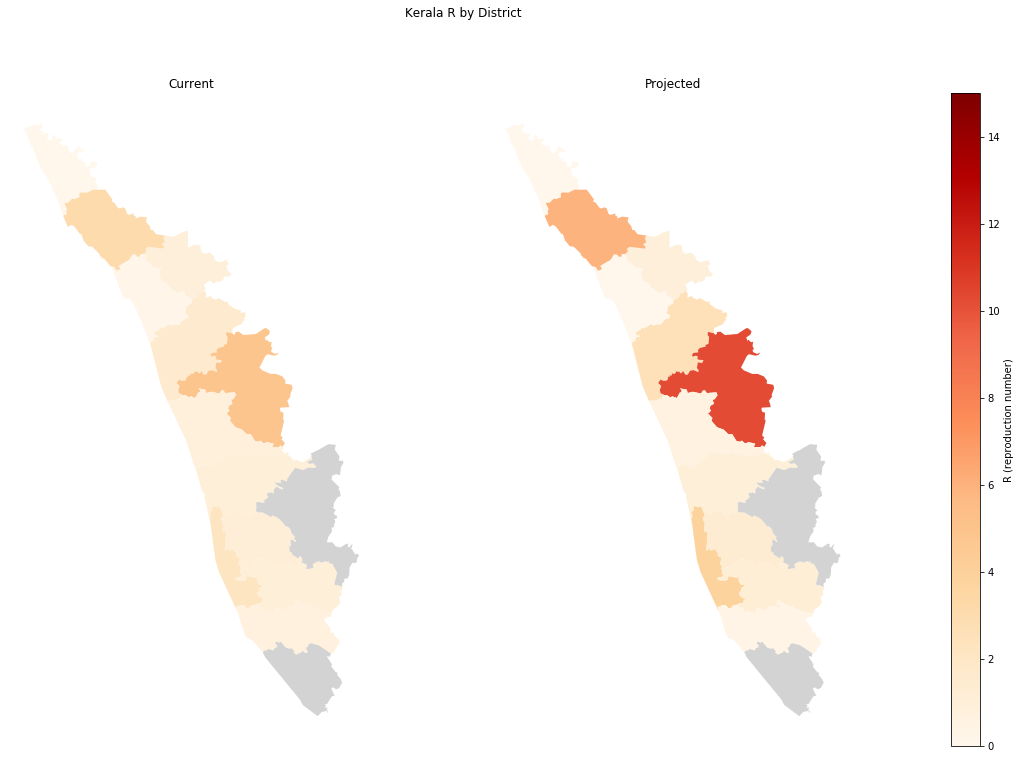

In [12]:
plotr(rdata)